# Distribution PLOT

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#built in dataset tips load
tips= sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


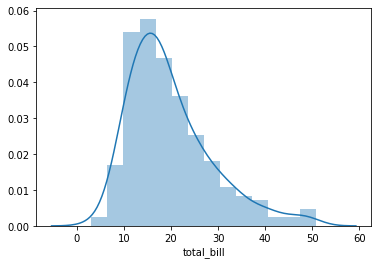

In [5]:
#first plot -> dist plot
sns.distplot(tips['total_bill'])

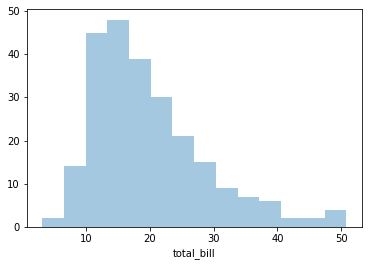

In [6]:
sns.distplot(tips['total_bill'], kde=False) #histogram

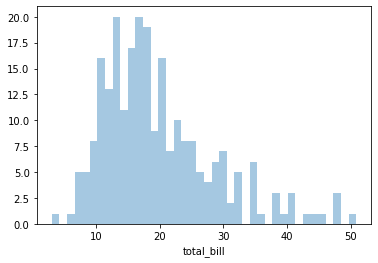

In [7]:
sns.distplot(tips['total_bill'], kde=False , bins=40)

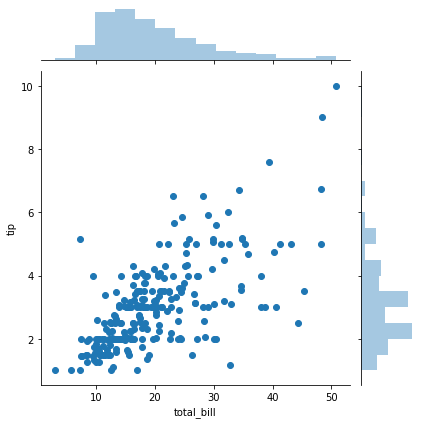

In [8]:
#jointplot-> combine two different distribution plot  or compare too things
sns.jointplot(x='total_bill',y='tip',data=tips)
#too distributtion plot 
#we mostly use jointplot with scatter graph bcz it shows more info and easiest to read

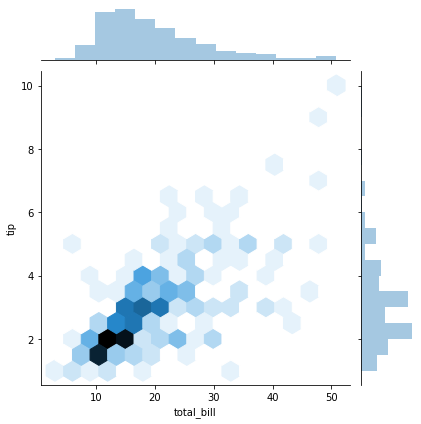

In [9]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex') #kind use to change kind of plot like scatter plot to hexagon plot.
#MORE point darker less points lighter

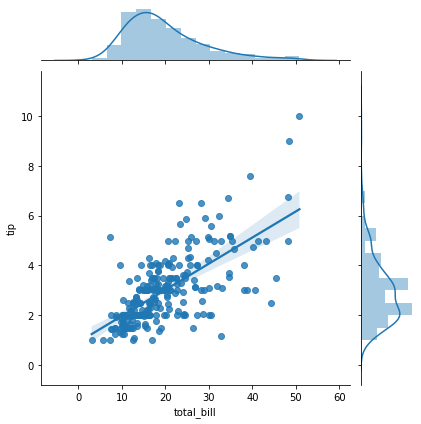

In [10]:
 sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg') # reg kind use to draw regression line on scatter plot.

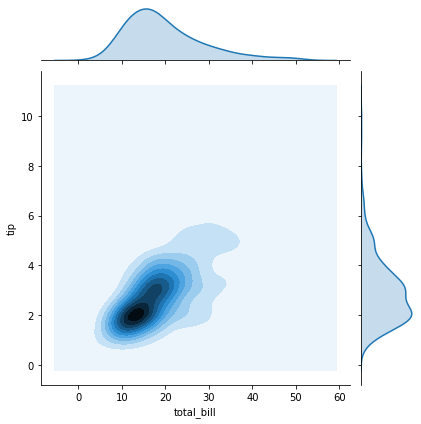

In [11]:
  sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde') 

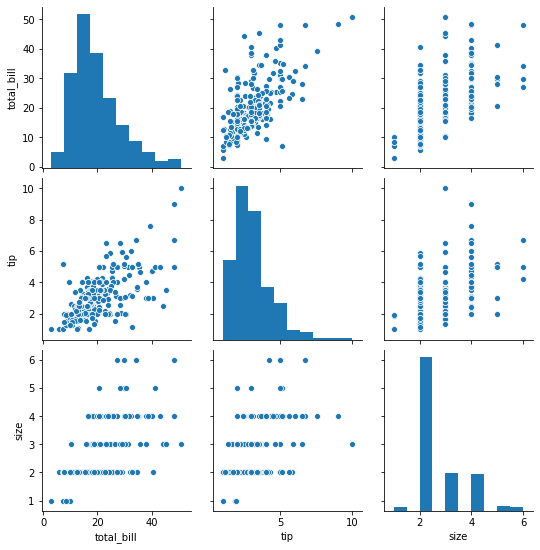

In [12]:
#pair plot-> plot pairwise relationships across an entire data frame at least for numerical column
sns.pairplot(tips) #-> plot whole dataframe possible combinatins

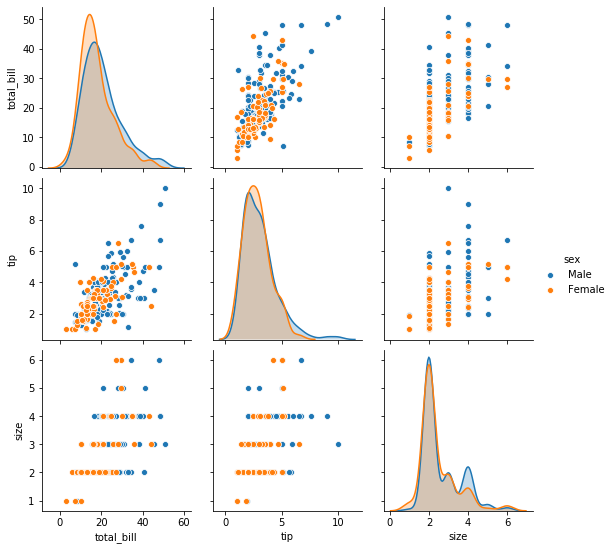

In [13]:
sns.pairplot(tips,hue='sex') #-> plot whole dataframe possible combinatins
#hue is used for catogorical column like male and female are two categories in same column

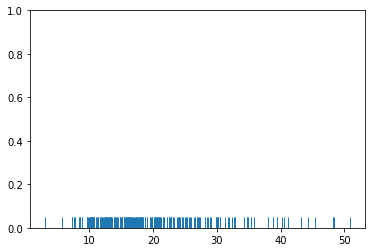

In [14]:
sns.rugplot(tips['total_bill']) #draw a dash on every single point of total bills on distribuition line vs histogram...

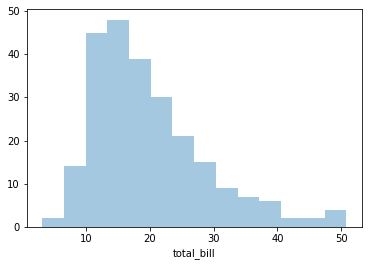

In [15]:
sns.distplot(tips['total_bill'],kde=False) #histograms counts how many dashes in specific area and make a bar accordingly

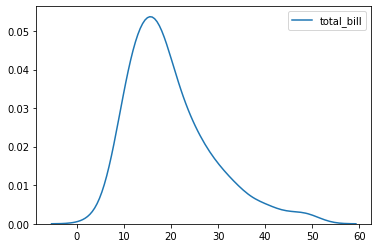

In [16]:
#KDE plot instead of dist plot
sns.kdeplot(tips['total_bill'])

# Categorical Plot

In [18]:
import numpy as np

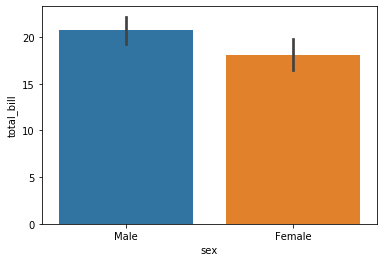

In [17]:
sns.barplot(x='sex',y='total_bill',data=tips) # x is a categorical column.. while y is a numerical column

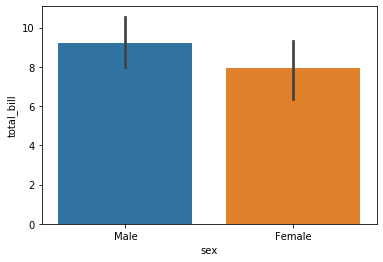

In [19]:
 sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std) #numpy standard daviation of of male and female

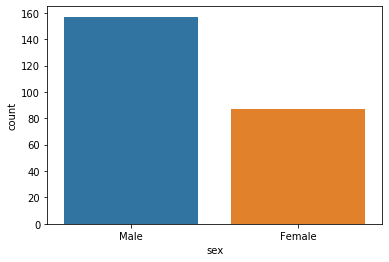

In [21]:
sns.countplot(x='sex', data=tips) #estimator is specifically counting the no of occurances (like pandas.count for column gender)
#x axis you choose.. y axis already choosen as count for counting values

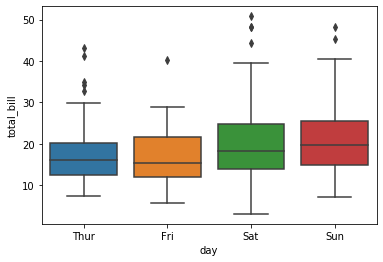

In [24]:
sns.boxplot(x='day',y='total_bill',data=tips)

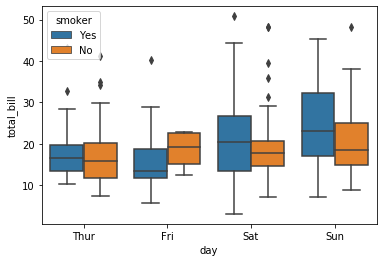

In [25]:
sns.boxplot(x='day',y='total_bill',data=tips, hue='smoker') #hue gives you one more layer of data

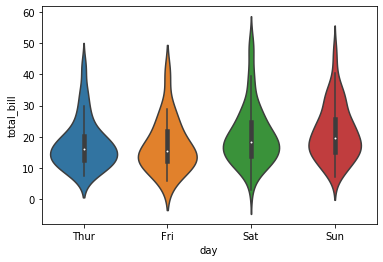

In [28]:
sns.violinplot(x='day',y='total_bill', data=tips)

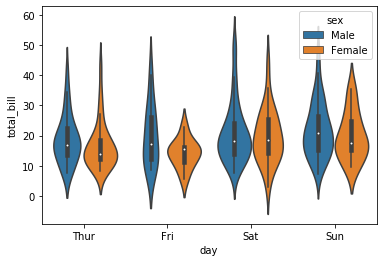

In [30]:
sns.violinplot(x='day',y='total_bill', data=tips, hue='sex')

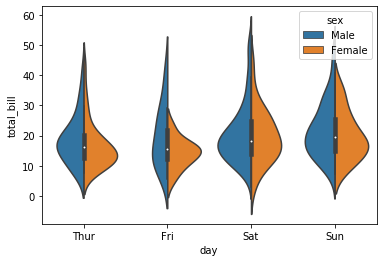

In [31]:
sns.violinplot(x='day',y='total_bill', data=tips, hue='sex',split=True)

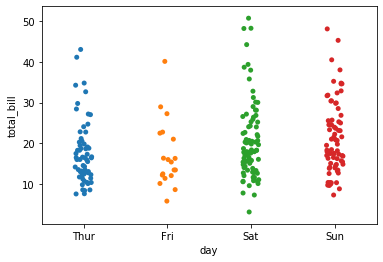

In [33]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True)

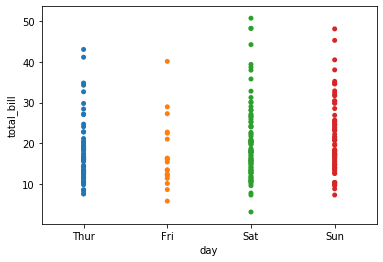

In [34]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=False)

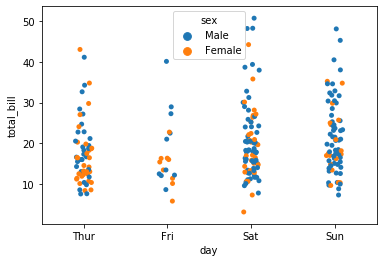

In [35]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex')

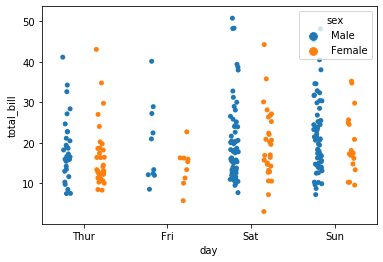

In [37]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex' , dodge=True) #dodge==split (new name of split)

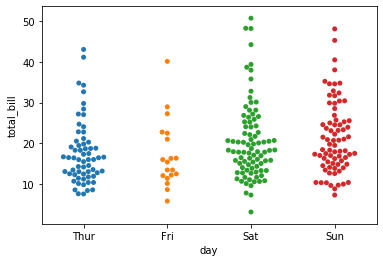

In [39]:
#plot kinda combination of strip plot or violin plot
sns.swarmplot(x='day', y='total_bill', data=tips) #not to use this for very large data sets as they go wide /ignore them

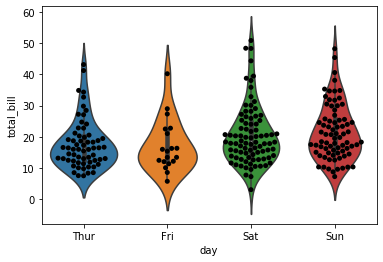

In [41]:
sns.violinplot(x='day', y='total_bill', data=tips) #this shows the overall plot
sns.swarmplot(x='day', y='total_bill', data=tips, color='black')#this shows each point on the plot which makes violin plot 

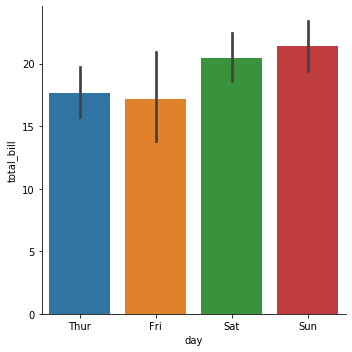

In [46]:
sns.catplot(x='day', y='total_bill', data=tips, kind='bar') #factorplot==catplot kind-> bar, violin, box
#catplot or factorplot are same thing.. catplot is the new name of factorplot

# MATRIX PLOTS

In [ ]:
#HEAT MAPS